In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [31]:
X, y = sklearn.datasets.make_moons(200, noise = 0.15)

In [32]:
X.shape

(200, 2)

In [33]:
y.shape

(200,)

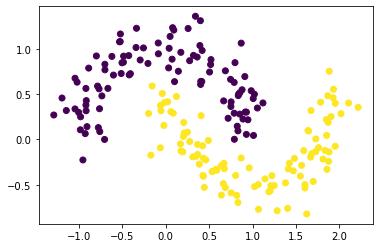

In [34]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [35]:
# Hyperparameters
input_neurons = 2 
hidden_neurons = 3
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lamda = 0.01

In [36]:
# Weight Initialization
model_dict = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

NameError: name 'w1' is not defined

In [37]:
def retrieve(model_dict):
    w1 = model_dict['w1']
    b1 = model_dict['b1']
    w2 = model_dict['w2']
    b2 = model_dict['b2']
    return w1, b1, w2, b2

In [56]:
def forward(x, model_dict):
    w1, b1, w2, b2 = retrieve(model_dict)
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax

In [57]:
def loss(softmax, y, model_dict):
    w1, b1, w2, b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    softmax_loss = np.sum(log_prob)
    
    reg_loss = lamda / 2*(np.sum(np.square(w1)) + np.sum(np.square(w2)))
    
    loss = softmax_loss + reg_loss
    return float(loss / y.shape[0]) 

In [58]:
def predict(x, model_dict):
    w1, b1, w2, b2 = retrieve(model_dict)
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(softmax, axis = 1)

In [62]:
 def backpropagation(X, y, model_dict, epochs):
        for i in range(epochs):
            w1, b1, w2, b2 = retrieve(model_dict)
            z1, a1, probs = forward(X, model_dict)
            delta3 = np.copy(probs)
            delta3[range(X.shape[0]), y] -= 1
            dw2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(w2.T) * (1-np.power(np.tanh(z1), 2)) 
            dw1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)
#             Add regularization
            dw2 += lamda*np.sum(w2)
            dw1 += lamda*np.sum(w1)
#         Update weights
            w1 += -learning_rate * dw1
            b1 += -learning_rate * db1
            w2 += -learning_rate * dw2
            b2 += -learning_rate * db2
#             Update model_dict
            model_dict = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
#             Print Loss
            if i % 50 == 0:
                print(f'Loss at epoch {i} is: {loss(probs, y, model_dict):.3f}')
        return model_dict

In [60]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
#     Xavier Initialization
    w1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['w1'] = w1
    model['b1'] = b1
    model['w2'] = w2
    model['b2'] = b2
    return model

In [63]:
model_dict = init_network(input_dim=input_neurons, hidden_dim=hidden_neurons, output_dim=output_neurons)
model = backpropagation(X=X, y=y, model_dict=model_dict, epochs=1500)

Loss at epoch 0 is: 0.003
Loss at epoch 50 is: 0.002
Loss at epoch 100 is: 0.003
Loss at epoch 150 is: 0.004
Loss at epoch 200 is: 0.006
Loss at epoch 250 is: 0.007
Loss at epoch 300 is: 0.007
Loss at epoch 350 is: 0.006
Loss at epoch 400 is: 0.004
Loss at epoch 450 is: 0.004
Loss at epoch 500 is: 0.004
Loss at epoch 550 is: 0.005
Loss at epoch 600 is: 0.005
Loss at epoch 650 is: 0.006
Loss at epoch 700 is: 0.007
Loss at epoch 750 is: 0.008
Loss at epoch 800 is: 0.010
Loss at epoch 850 is: 0.011
Loss at epoch 900 is: 0.013
Loss at epoch 950 is: 0.014
Loss at epoch 1000 is: 0.016
Loss at epoch 1050 is: 0.018
Loss at epoch 1100 is: 0.020
Loss at epoch 1150 is: 0.021
Loss at epoch 1200 is: 0.023
Loss at epoch 1250 is: 0.026
Loss at epoch 1300 is: 0.028
Loss at epoch 1350 is: 0.030
Loss at epoch 1400 is: 0.033
Loss at epoch 1450 is: 0.035
